# Regressions

## Linear regressions

__Import the Duncan/carData dataset__

In [2]:
import statsmodels.api as sm
dataset = sm.datasets.get_rdataset("Duncan", "carData")
df = dataset.data
df.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


__Estimate by hand the model $\text{income} = \alpha + \beta  \times \text{education}$ . Plot.__

__Compute total, explained, unexplained variance. Compute R^2 statistics__

__Use statsmodels (formula API) to estimate $\text{income} = \alpha + \beta  \times \text{education}$. Comment regression statistics.__

In [9]:
#https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

from statsmodels.formula import api as smf

model_1 = smf.ols("income ~ education", df)
res_1 = model_1.fit()

In [10]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.84e-08
Time:                        11:29:50   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`. At a 5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.52: the model explains half of the variance.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{prestige}$. Comment regression statistics.__

In [15]:
formula = "income ~ education"

In [16]:
df.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [47]:
model_2 = smf.ols("income ~ prestige", df)
res_2 = model_2.fit()

In [48]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           7.14e-13
Time:                        11:55:59   Log-Likelihood:                -179.93
No. Observations:                  45   AIC:                             363.9
Df Residuals:                      43   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8840      3.678      2.959      0.005       3.467      18.301
prestige       0.6497      0.065     10.062      0.000       0.519       0.780
==============================================================================
Omnibus:                        8.893   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               19.848
Skew:                           0.047   Prob(JB):                     4.90e-05
Kurtosis:                       6.252   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`.
At a 0.5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.70: the model predicts income better than the former one.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{education}  + \beta_2  \times \text{prestige}  + $. Comment regression statistics.__

In [49]:
model_3 = smf.ols("income ~ education + prestige", df)
res_3 = model_3.fit()

In [50]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.55
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           8.88e-12
Time:                        11:56:03   Log-Likelihood:                -179.90
No. Observations:                  45   AIC:                             365.8
Df Residuals:                      42   BIC:                             371.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4264      4.164      2.504      0.016       2.024      18.829
education      0.0323      0.132      0.244      0.808      -0.234       0.299
prestige       0.6237      0.125      5.003      0.000       0.372       0.875
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               21.265
Skew:                           0.075   Prob(JB):                     2.41e-05
Kurtosis:                       6.364   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


---
The $R^2$ is only slightly higher than last model, but adjusted $R^2$ is actually lower: the model has less predictive power.

The coefficient for `education` is not significant. It should be dropped from the regresssion.

This might happen, because education and prestige are correlated. Let's check it:

In [37]:
df.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


Education and prestige are correlated at 83\%. It makes no sense keeping the two in the same regression.

__WHich model would you recommend? For which purpose?__

If the goal is to predict income, the one with prestige only, has the highest prediction power.
If we are interested in the effect of education, we keep only education.

__Plot the regression with prestige__

In [53]:
a = res_2.params.Intercept
b = res_2.params.prestige


In [54]:
x = df['prestige']

In [55]:
y = a + b*x

Text(0.5, 0, 'income')

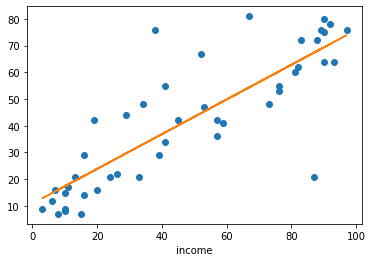

In [57]:
from matplotlib import pyplot as plt
plt.plot(x, df['income'],'o')
plt.plot(x, y)
plt.xlabel("prestige")
plt.xlabel("income")

__Check visually normality of residuals__

In [62]:
pred = a + b*x
actual = df['income']
resid = actual - pred  # same as res_2.resid

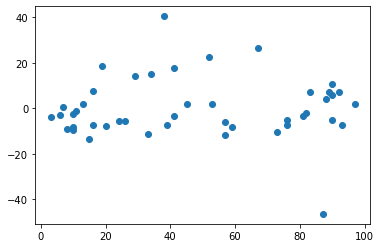

In [65]:
plt.plot(x,resid, 'o')

(array([0.00255915, 0.        , 0.        , 0.00511829, 0.0486238 ,
        0.02815062, 0.01535488, 0.01023659, 0.00255915, 0.00255915]),
 array([-46.40643935, -37.72299114, -29.03954294, -20.35609473,
        -11.67264653,  -2.98919832,   5.69424989,  14.37769809,
         23.0611463 ,  31.74459451,  40.42804271]),
 <BarContainer object of 10 artists>)

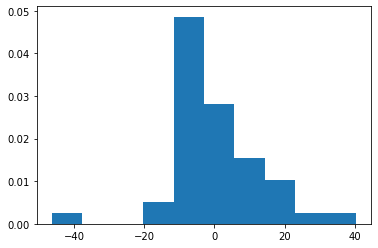

In [69]:
plt.hist(resid)

## Finding the right model

__Import dataset from `data.dta`. Explore dataset (statistics, plots)__

__Our goal is to explain `z` by `x` and `y`. Run a regression.__

__Examine the residuals of the regression. What's wrong? Remedy?__

## Taylor Rule

In 1993, John taylor, estimated, using US data the regression: $i_t = i^{\star} + \alpha_{\pi} \pi_t + \alpha_{\pi} y_t$ where $\pi_t$ is inflation and $y_t$ the output gap (let's say deviation from real gdp from the trend).
He found that both coefficients were not significantly different from $0.5$.
Our goal, is to replicate the same analysis.

__Import macro data from statsmodels (https://www.statsmodels.org/devel/datasets/generated/macrodata.html)__

__Create a database with all variables of interest including detrended gdp__

__Run the basic regression__

__Which control variables would you propose to add? Does it increase prediction power? How do you interpret that?__